<a href="https://colab.research.google.com/github/alexssroa/proyecto/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import folium

sheet_url = "https://docs.google.com/spreadsheets/d/1-xvlA7IbLddoiO8YIhpPylXyipY0tt4uHfIASGFSa2g/edit#gid=0"
url_1 = sheet_url.replace("/edit#gid=", "/export?format=csv&gid=")
pd.read_csv(url_1)
state_geo = "https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json"
state_data = pd.read_csv(url_1)

m = folium.Map(location=[22, -102], zoom_start=5)

folium.Choropleth(
    geo_data=state_geo,
    
    
    name="choropleth",
    data=state_data,
    columns=["Estado", "Δ Solicitantes"],
    key_on="feature.id",
    fill_color='RdYlGn',
    fill_opacity=1,
    line_opacity=1,
    legend_name="Δ Solicitantes",
).add_to(m)

folium.LayerControl().add_to(m)

m


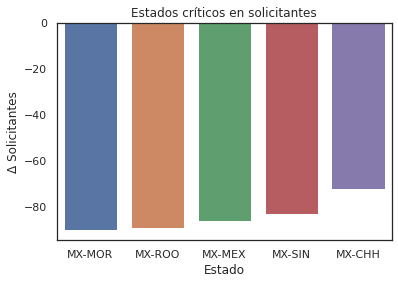

In [ ]:
state_data
estados_criticos = state_data.sort_values(by='Δ Solicitantes', ascending=True)
estados_criticos.head()

import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(x="Estado", y="Δ Solicitantes", data=estados_criticos.head())
ax.set_title('Estados críticos en solicitantes')
ax.set(ylabel='Δ Solicitantes');

In [127]:
  import pandas as pd
  import folium

  sheet_url = "https://docs.google.com/spreadsheets/d/1DP6YabJtaJAs02V_cun-PfUVvXXNo6JFOWn8n3kSg2o/edit#gid=0"
  url_1 = sheet_url.replace("/edit#gid=", "/export?format=csv&gid=")
  pd.read_csv(url_1)
  state_geo = "https://raw.githubusercontent.com/angelnmara/geojson/master/Municipios/17_Morelos.json"
  state_data = pd.read_csv(url_1)

  m = folium.Map(location=[22, -102], zoom_start=5)

  folium.Choropleth(
      geo_data=state_geo,
      
      
      name="choropleth",
      data=state_data,
      columns=["Municipio", "Δ Solicitantes"],
      key_on="feature.properties.NAME_2",
      fill_color='RdYlGn',
      fill_opacity=1,
      line_opacity=1,
      legend_name="Δ Solicitantes",
  ).add_to(m)


  m

In [128]:
state_data
municipios_criticos = state_data.sort_values(by='Δ Solicitantes', ascending=True)
municipios_criticos.head()

,Municipio,Δ Solicitantes
24,Tlaltizapán,-479
25,Tlaquiltenango,-463
28,Xochitepec,-402
13,Mazatepec,-366
17,Temixco,-361


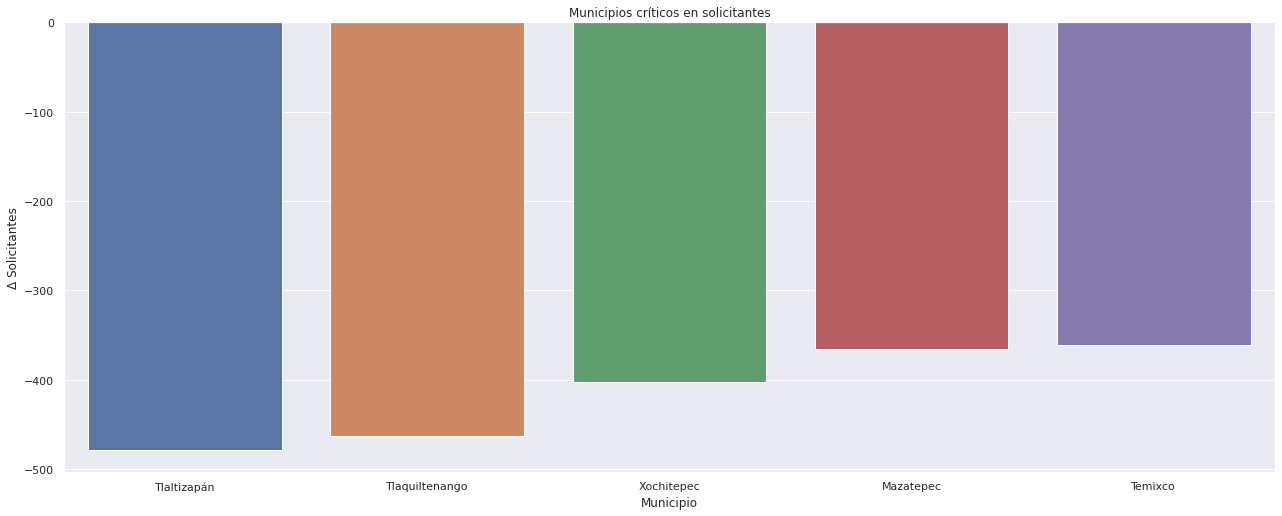

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(21.7,8.27)})
ax = sns.barplot(x="Municipio", y="Δ Solicitantes", data=municipios_criticos.head())
ax.set_title('Municipios críticos en solicitantes')
ax.set(ylabel='Δ Solicitantes');

In [167]:
import pandas as pd
eventos = pd.read_csv("https://raw.githubusercontent.com/alexssroa/proyecto/main/historico%20eventos.csv", index_col=0)
eventos.head()




,Tipo de Evento,Detalle de Tipo de Evento,Campus Organizador,ID del Evento,Nivel Objetivo,ATR Evento: Nombre del Evento,Fecha de Solicitante,Fecha de Admitido,Fecha de IPP,Dias Solicitante - Inicio Evento,Dias Admitido - Inicio Evento,Dias IPP - Inicio Evento,Efectivo Solicitantes,Efectivo Admitido,Efectivo IPP
Contacto: Id. de contacto,,,,,,,,,,,,,,,
0033f00000DFL1T,Open House,BTEC,TEC Campus Colima,EVN-0228688,Preparatoria,BPrepaTec Campus Colima,44494.0,44496.0,NaN,-12,-10,0,0,0,0
0033f000002WJOn,Visita al Campus,NaN,TEC Campus Chihuahua,EVN-0171642,Profesional,Visitas al Campus,NaN,NaN,NaN,0,0,0,0,0,0
0033f000002UF4F,Entrega de resultados de admision,NaN,TEC Campus Guadalajara,EVN-0176842,Profesional,Sesion de Bienvenida en Linea,43803.0,43813.0,43585.0,-163,-153,-381,0,0,0
0033f000006NsLK,Planeacion,NaN,TEC Campus Monterrey,EVN-0217846,Profesional,Sesion Me Preparo Campus Monterrey,44144.0,44181.0,43924.0,-203,-166,-423,0,0,0
0034100002AyD7m,Seguimiento a Admitidos,NaN,TEC Campus Monterrey,EVN-0157545,Profesional,Planeacion ING 11:00am / 18-07 Campus Monterre...,43451.0,43452.0,43403.0,-213,-212,-261,0,0,0


In [49]:
#Nueva Linea

nuevoDf = pd.concat([eventos, powerOfOne_Renamed], axis=1)
nuevoDf.groupby(['Tipo de Evento']).sum()

,Fecha de Solicitante,Fecha de Admitido,Fecha de IPP,Dias Solicitante - Inicio Evento,Dias Admitido - Inicio Evento,Dias IPP - Inicio Evento,Efectivo Solicitantes,Efectivo Admitido,Efectivo IPP,Power of One
Tipo de Evento,,,,,,,,,,
Aplicacion PAA,29943577.0,33435601.0,21659931.0,-23755,8364,-87699,97,51,1,920
Ceremonia de entrega de apoyos educativos,52272009.0,66146421.0,65723252.0,-273952,-311310,-645580,0,0,0,1678
Continuidad Prepa Tec a Profesional,6333384.0,32429836.0,29771452.0,-19616,1391,-115423,13,31,14,1025
Decanos,1799620.0,2413880.0,2055670.0,-4491,-6308,-12750,0,0,0,65
Dia D,14767419.0,17461068.0,14368378.0,-33477,-30815,-82139,11,9,0,548
EUC,5379007.0,5336773.0,4257658.0,-5148,-3283,-22440,34,38,0,136
Entrega de resultados de admision,277436369.0,291254863.0,248817300.0,-208695,-68180,-1229780,47,66,1,7518
Examen Ubicacion,1347323.0,2186970.0,1919646.0,-2866,-2276,-8414,7,22,0,51
Feria universitaria,42677010.0,47955918.0,37133590.0,149095,155776,-35187,13,15,21,3402


In [131]:
datosPorTipoEvento = nuevoDf.groupby(['Tipo de Evento']).sum()[["Efectivo Solicitantes", "Efectivo Admitido", "Efectivo IPP","Power of One"]]
EfectividadSolicitantes = datosPorTipoEvento["Efectivo Solicitantes"]/datosPorTipoEvento["Power of One"]
EfectividadAdmitidos = datosPorTipoEvento["Efectivo Admitido"]/datosPorTipoEvento["Power of One"]
EfectividadIPP = datosPorTipoEvento["Efectivo IPP"]/datosPorTipoEvento["Power of One"]



In [132]:
datosPorTipoEvento = nuevoDf.groupby(['Tipo de Evento']).sum()[["Efectivo Solicitantes", "Efectivo Admitido", "Efectivo IPP","Power of One"]]
nuevoDf2 = pd.concat([EfectividadSolicitantes,EfectividadAdmitidos,EfectividadIPP], axis=1)
nuevoDf2
mappingNameDf2 = {0: "Efectividad Solicitantes",1: "Efectividad Admitidos",2: "Efectividad IPP"}
EfectividadDeEventos_Renamed = nuevoDf2.rename(columns=mappingNameDf2)
EfectividadDeEventos_Renamed.head()





,Efectividad Solicitantes,Efectividad Admitidos,Efectividad IPP
Tipo de Evento,,,
Aplicacion PAA,0.105435,0.055435,0.001087
Ceremonia de entrega de apoyos educativos,0.000000,0.000000,0.000000
Continuidad Prepa Tec a Profesional,0.012683,0.030244,0.013659
Decanos,0.000000,0.000000,0.000000
Dia D,0.020073,0.016423,0.000000


In [152]:
Efectividad_Sol = EfectividadDeEventos_Renamed[["Efectividad Solicitantes"]]
Efectividad_Sol
Efectividad_Sol = Efectividad_Sol.reset_index()
Efectividad_Solicitants_Sorted = Efectividad_Sol.sort_values(by='Efectividad Solicitantes', ascending=False)
Efectividad_Solicitants_Sorted.head()
filtroEfectividad_Solicitants_Sorted_sinExamenesUbicacion = Efectividad_Solicitants_Sorted['Tipo de Evento'] != "Examen Ubicacion"
filtroEfectividad_Solicitants_Sorted_sinEUC = Efectividad_Solicitants_Sorted['Tipo de Evento'] != "EUC"
filtroEfectividad_Solicitants_Sorted_sinPAA = Efectividad_Solicitants_Sorted['Tipo de Evento'] != "Aplicacion PAA"
EF_SOL = Efectividad_Solicitants_Sorted[filtroEfectividad_Solicitants_Sorted_sinExamenesUbicacion & filtroEfectividad_Solicitants_Sorted_sinEUC & filtroEfectividad_Solicitants_Sorted_sinPAA].head()
EF_SOL

,Tipo de Evento,Efectividad Solicitantes
22,Taller de preparacion para PAA,0.114173
26,Vivencia Tec,0.074380
12,Motor de landings,0.073879
13,Open House,0.045899
20,Sesion Informativa Apoyos Educativos,0.045449


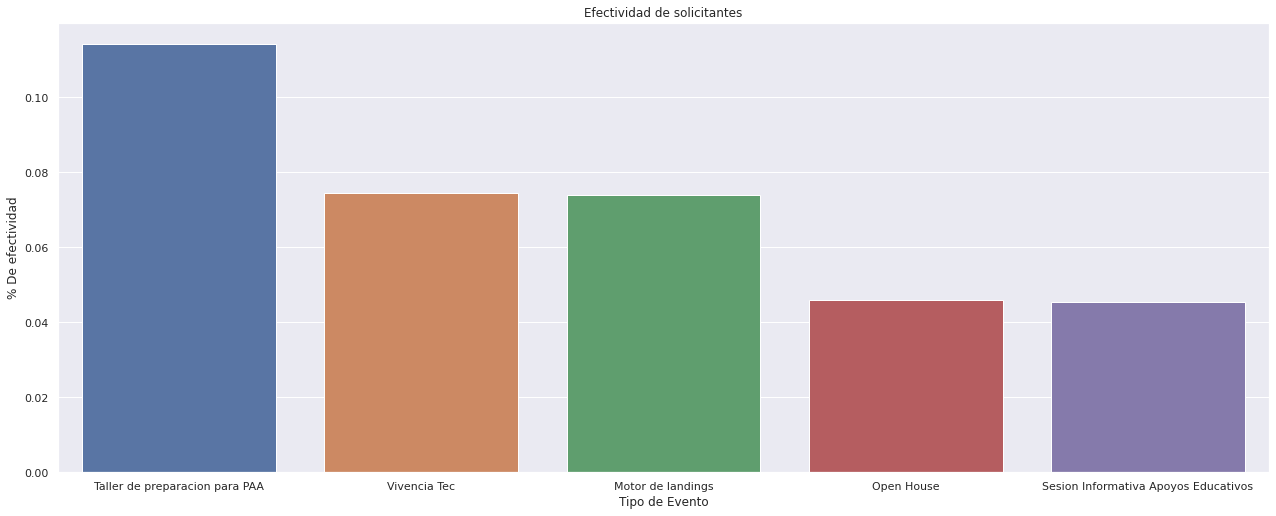

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(21.7,8.27)})
ax = sns.barplot(x="Tipo de Evento", y="Efectividad Solicitantes", data=EF_SOL.head())
ax.set_title('Efectividad de solicitantes')
ax.set(ylabel='% De efectividad');

In [ ]:
Efectividad_Sol = EfectividadDeEventos_Renamed[["Efectividad Solicitantes"]]
Efectividad_Sol
Efectividad_Sol = Efectividad_Sol.reset_index()
Efectividad_Solicitants_Sorted = Efectividad_Sol.sort_values(by='Efectividad Solicitantes', ascending=False)
Efectividad_Solicitants_Sorted.head()

In [155]:
Efectividad_Admin = EfectividadDeEventos_Renamed[["Efectividad Admitidos"]]
Efectividad_Admin
Efectividad_Admin = Efectividad_Admin.reset_index()
Efectividad_Admin_Sorted = Efectividad_Admin.sort_values(by='Efectividad Admitidos', ascending=False)
Efectividad_Admin_Sorted
filtroEfectividad_Admin_Sorted_sinExamenes = Efectividad_Admin_Sorted['Tipo de Evento'] != "Examen Ubicacion"
filtroEfectividad_Admin_Sorted_sinEUC = Efectividad_Admin_Sorted['Tipo de Evento'] != "EUC"
filtroEfectividad_Admin_Sorted_sinPAA = Efectividad_Admin_Sorted['Tipo de Evento'] != "Aplicacion PAA"
EF_ADMIN = Efectividad_Admin_Sorted[filtroEfectividad_Admin_Sorted_sinExamenes & filtroEfectividad_Admin_Sorted_sinEUC & filtroEfectividad_Admin_Sorted_sinPAA].head()
EF_ADMIN

,Tipo de Evento,Efectividad Admitidos
23,Tec 360,0.089811
26,Vivencia Tec,0.082645
20,Sesion Informativa Apoyos Educativos,0.046715
22,Taller de preparacion para PAA,0.037008
12,Motor de landings,0.034301


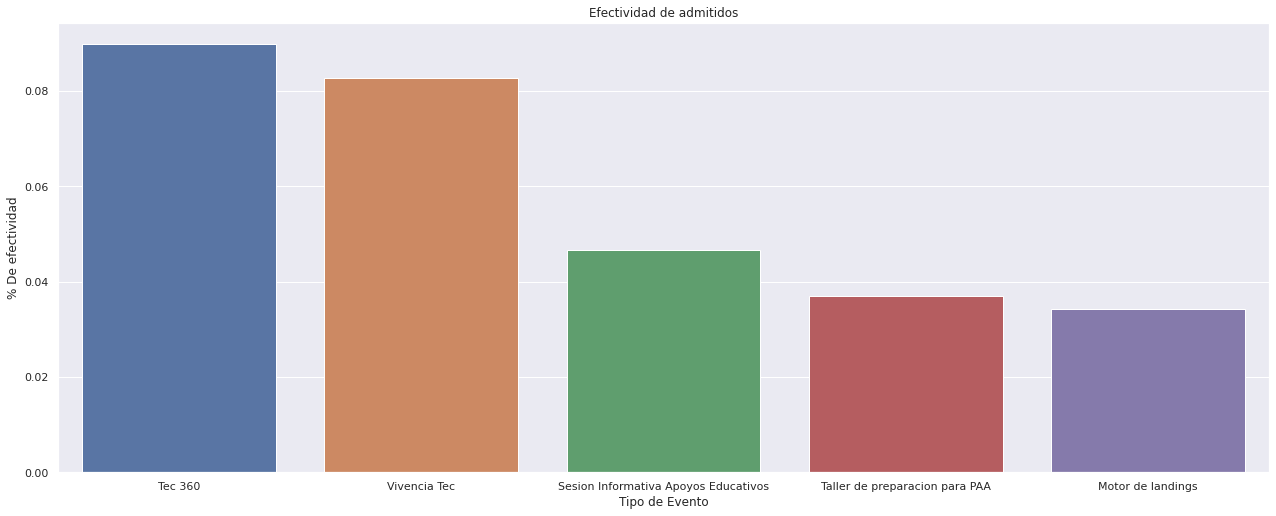

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(21.7,8.27)})
ax = sns.barplot(x="Tipo de Evento", y="Efectividad Admitidos", data=EF_ADMIN.head())
ax.set_title('Efectividad de admitidos')
ax.set(ylabel='% De efectividad');

In [165]:
Efectividad_IPP = EfectividadDeEventos_Renamed[["Efectividad IPP"]]
Efectividad_IPP
Efectividad_IPP = Efectividad_IPP.reset_index()
Efectividad_IPP_Sorted = Efectividad_IPP.sort_values(by='Efectividad IPP', ascending=False)
Efectividad_IPP_Sorted.head()

,Tipo de Evento,Efectividad IPP
2,Continuidad Prepa Tec a Profesional,0.013659
23,Tec 360,0.010777
13,Open House,0.009392
10,Landing Escuelas Vinculadas,0.008639
20,Sesion Informativa Apoyos Educativos,0.008609


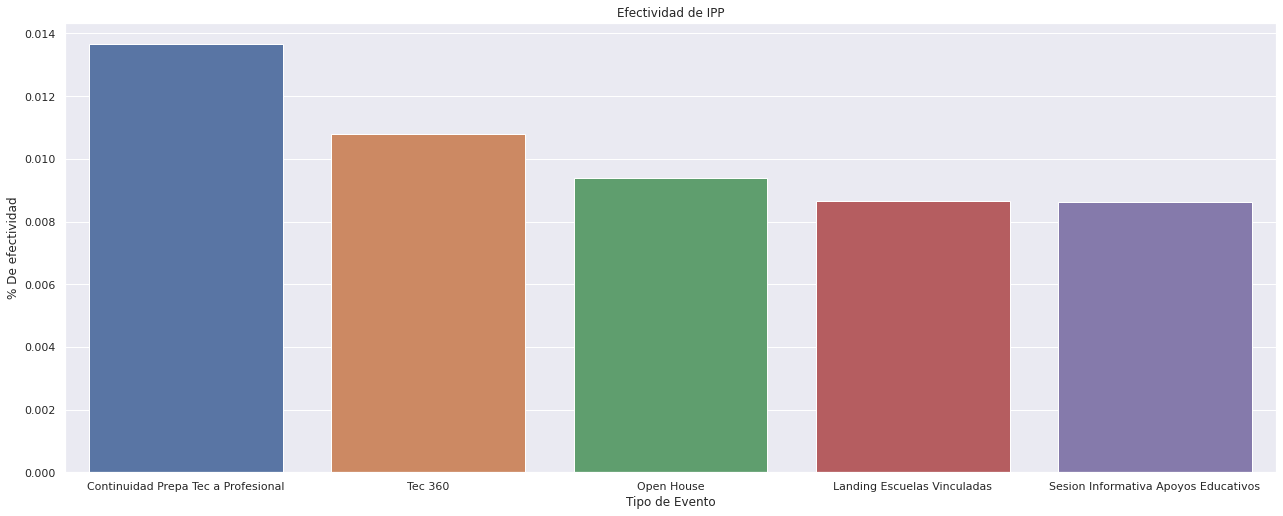

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(21.7,8.27)})
ax = sns.barplot(x="Tipo de Evento", y="Efectividad IPP", data=Efectividad_IPP_Sorted.head())
ax.set_title('Efectividad de IPP')
ax.set(ylabel='% De efectividad');

In [174]:
#Respuestas de las encuestas de evento Tec 360 para determinar las actividades clave que hacen que el evento sea más atractivo
import pandas as pd
encuesta = pd.read_csv("https://raw.githubusercontent.com/alexssroa/proyecto/main/Tec%20evento.csv")
encuesta.head()
import matplotlib.pyplot as plt
import seaborn as sns
encuesta.head()

,Fecha de inicio,Contacto: Id. de contacto,Tipo de Evento,ID del Evento,Experiencia General,Duracion,Calidad de Alimentos,Interaccion con exalumnos,Interaccion con profesores
0,44265,0034100002Q8VMJ,Tec 360,EVN-0205033,4,4,4,4,4
1,44119,0034100000yj366,Tec 360,EVN-0192863,5,4,4,5,4
2,44119,00341000019HV98,Tec 360,EVN-0192863,5,4,4,5,4
3,44265,0034100002Q4R34,Tec 360,EVN-0205033,5,4,4,5,3
4,44265,0034100002Q5N9J,Tec 360,EVN-0205033,4,4,4,5,4


In [179]:
encuesta_filtered = encuesta.drop(columns=['ID del Evento','Tipo de Evento','Fecha de inicio',	'Contacto: Id. de contacto'])
encuesta_filtered
encuesta_filtered.corr()

,Experiencia General,Duracion,Calidad de Alimentos,Interaccion con exalumnos,Interaccion con profesores
Experiencia General,1.000000,-0.015414,-0.007486,0.000621,-0.012074
Duracion,-0.015414,1.000000,-0.001679,0.007996,-0.001256
Calidad de Alimentos,-0.007486,-0.001679,1.000000,-0.001082,-0.000403
Interaccion con exalumnos,0.000621,0.007996,-0.001082,1.000000,0.030559
Interaccion con profesores,-0.012074,-0.001256,-0.000403,0.030559,1.000000


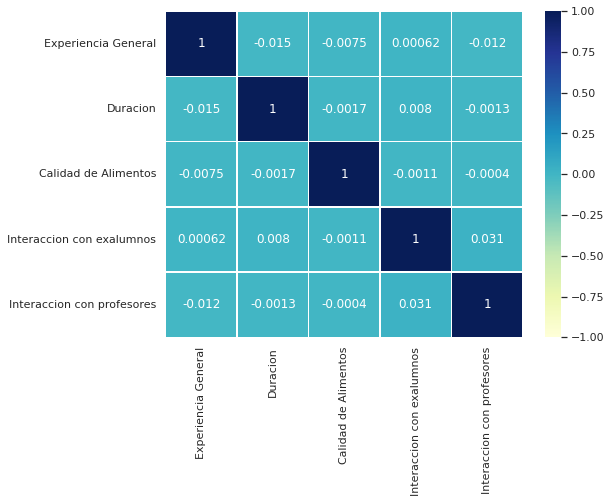

In [180]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(encuesta_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);